# Tutorial. Semiparametric NVM algorithms

## Estimation of parameter $\mu$ of Normal Mean-Variance(NMV) mixture

Parameter $\mu$ estimation for $Y_{NMVM}(\xi, \alpha, \mu) = \alpha + \mu \cdot \xi + \sqrt{\xi} \cdot N$\
where $\alpha = 0; N \sim \mathcal{N}(0, 1); \xi \sim g(x)$

Algorithm was created by Belomestny & Panov(2017)

Let's create NMV mixture with parameter $\mu = 2$, $\alpha = 0$ and half-normal mixing density function.

In [10]:
from scipy.stats import halfnorm
from src.mixtures.nmv_mixture import NormalMeanVarianceMixtures

real_mu = 2
mixture = NormalMeanVarianceMixtures("canonical", alpha=0, mu=real_mu, distribution=halfnorm)

Then we can generate sample from this mixture. Let size of the sample to be equal to 1000.

In [11]:
from src.generators.nmv_generator import NMVGenerator

sample = NMVGenerator().canonical_generate(mixture, 1000)

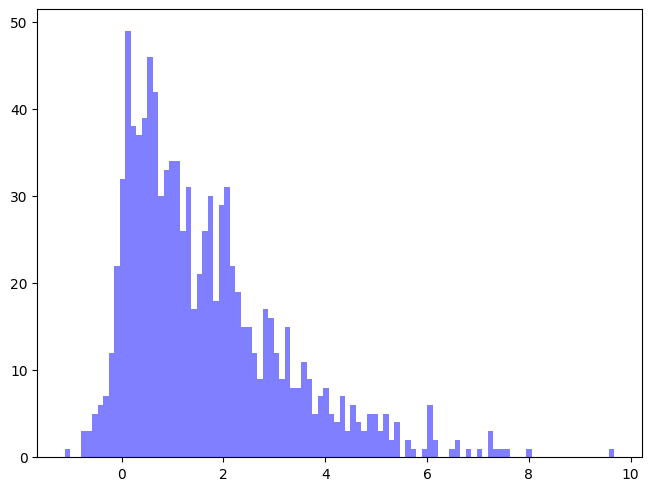

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(layout='constrained')
ax.hist(sample, bins=100, color='blue', alpha=0.5)
plt.show()

Now we imagine that we only thing we know about this sample is that it is distributed as Normal Mean-Variance mixture and $\alpha = 0$.
So now we will try to estimate parameter $\mu$ using corresponding algorithm.

Firstly, we create new estimator for NMV-mixture and select an algorithm by its name.
At this step we can choose `m` - search radius and `tolerance` - acceptable convergence tolerance

In [13]:
from src.estimators.semiparametric.nmv_semiparametric_estimator import NMVSemiParametricEstimator

estimator = NMVSemiParametricEstimator("mu_estimation", {"m": 10, "tolerance": 10 ** -5})

And after that we estimate $\mu$ value.

In [14]:
estimate_result = estimator.estimate(sample)
print("Estimated mu value: ", estimate_result.value, "\nEstimation is successful: ", estimate_result.success)
print("Difference: ", real_mu - estimate_result.value)

Estimated mu value:  2.2555574774742126 
Estimation is successful:  True
Difference:  -0.25555747747421265


## Estimation of mixing density for given $\mu$ in Normal Mean-Variance mixture.

Mixing density function $g(x)$ estimation for $Y_{NMVM}(\xi, \alpha, \mu) = \alpha + \mu \cdot \xi + \sqrt{\xi} \cdot N$ \
where $\alpha = 0, \mu \in \mathbf{R}; N \sim \mathcal{N}(0, 1); \xi \sim g(x)$

Algorithm was created by Belomestny & Panov(2017)

## Example 1. $\xi$ is distributed exponentially.

For demonstration purposes to use the algorithm we can generate sample with size 100 from NMV mixture with parameter  $\alpha = 0$, $\mu = 1$ and mixing density function $g(x) = exp(-x)$

In [15]:
from scipy.stats import expon
from src.generators.nmv_generator import NMVGenerator
from src.mixtures.nmv_mixture import NormalMeanVarianceMixtures

real_g = expon.pdf # Real g(x)
real_mu = 1
size = 100

mixture = NormalMeanVarianceMixtures("canonical", alpha=0, mu=real_mu, distribution=expon)
sample = NMVGenerator().canonical_generate(mixture, size)

Now we assume that we know nothing about $g(x)$, and try to estimate it in points 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4
Result of the estimation can be accesses by `est.list_value`

In [16]:
from src.estimators.semiparametric.nmv_semiparametric_estimator import NMVSemiParametricEstimator

x_data = [0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4] # x points to estimate g(x)
estimator = NMVSemiParametricEstimator(
    "g_estimation_given_mu", {"x_data": x_data, "u_value": 7.6, "v_value": 0.9}
)
est = estimator.estimate(sample)
est_data = est.list_value

Let's see algorithm work result

In [17]:
for i in range(len(x_data)):
    print('x =', x_data[i], 'Real g(x) value: ', real_g(x_data[i]), 'Estimated: ', est_data[i])

x = 0.05 Real g(x) value:  0.951229424500714 Estimated:  1.6119786968759628
x = 0.1 Real g(x) value:  0.9048374180359595 Estimated:  1.645930532665022
x = 0.2 Real g(x) value:  0.8187307530779818 Estimated:  1.4452274129735472
x = 0.4 Real g(x) value:  0.6703200460356393 Estimated:  1.106472760910111
x = 0.8 Real g(x) value:  0.44932896411722156 Estimated:  0.7295892399320676
x = 1.6 Real g(x) value:  0.20189651799465538 Estimated:  0.39373091568425855
x = 3.2 Real g(x) value:  0.04076220397836621 Estimated:  0.14506824812710012
x = 6.4 Real g(x) value:  0.001661557273173934 Estimated:  0


We got our results. Now it's time to plot together the real mixing density function and our estimated values.

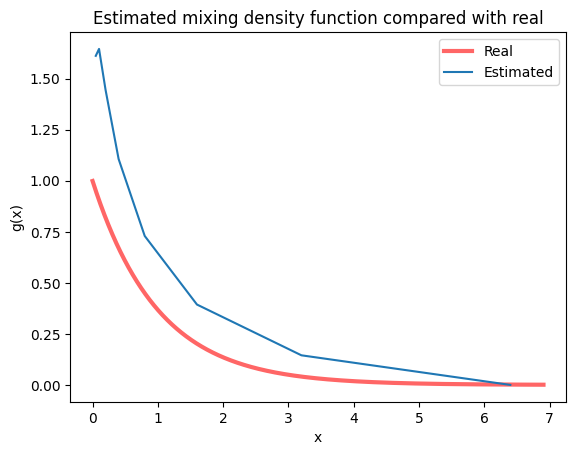

In [33]:
import numpy as np

fig, ax = plt.subplots()
x = np.linspace(expon.ppf(0.001), expon.ppf(0.999), 10000)
ax.plot(x, expon.pdf(x), 'r-', lw=3, alpha=0.6)
ax.plot(x_data, est_data)
plt.title("Estimated mixing density function compared with real")
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend(['Real', 'Estimated'])
plt.show()

Let's compute error for each estimated point and plot it. Error is calculated by such formula suggested by Belomestny&Popov(2017):\
$Error(x) = \sqrt{min(x^{2\gamma}, 1) * (g_{real}(x) - g_{estimated}(x))^2}$

In [42]:
import math
errors = []
for i in range(len(x_data)):
    error = math.sqrt(min(x_data[i]**(2*0.25), 1)*(real_g(x_data[i]) - est_data[i])**2)
    errors.append(error)
    print('x =', x_data[i], 'Error: ', error)

x = 0.05 Error:  0.31244904000192275
x = 0.1 Error:  0.41674728416995027
x = 0.2 Error:  0.41896356740527013
x = 0.4 Error:  0.3468594874119488
x = 0.8 Error:  0.2650538041888063
x = 1.6 Error:  0.19183439768960317
x = 3.2 Error:  0.1043060441487339
x = 6.4 Error:  0.001661557273173934


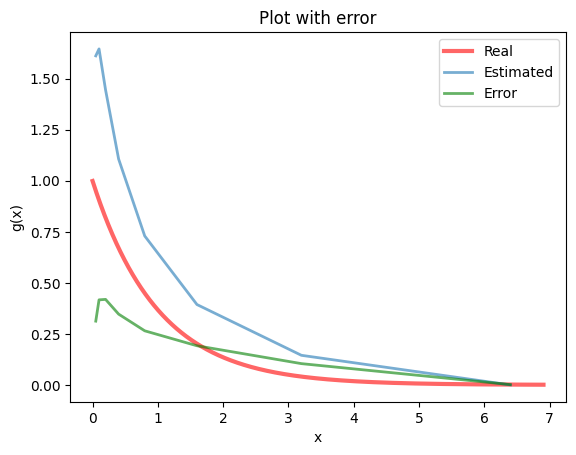

In [43]:
fig, ax = plt.subplots()
x = np.linspace(expon.ppf(0.001), expon.ppf(0.999), 10000)
ax.plot(x, expon.pdf(x), 'r-', lw=3, alpha=0.6)
ax.plot(x_data, est_data, lw=2, alpha=0.6)
ax.plot(x_data, errors, 'g-', lw=2, alpha=0.6)
plt.title("Plot with error")
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend(['Real', 'Estimated', 'Error'])
plt.show()